<a href="https://colab.research.google.com/github/lamia-6001/week3/blob/main/Finall_qurrah22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkred'>**qurrah**</font>


<a id='intro'></a>
## **Introduction**

> This dataset represents beneficiaries of Qurrah, a childcare support program initiated by the Human Resources Development Fund to empower working women in Saudi Arabia.

> Qurrah aims to facilitate women's participation in the workforce while ensuring quality childcare for their children. The program covers 50% of daycare costs per child, with a maximum support of 1600 SAR.

>  Children eligible for Qurrah should not exceed six years of age.

>  Please note that the data file needs to be uploaded to Colab by dragging it from the usecase directory to the Colab file directory for further analysis.


## **Generate Questions**

In this project, we'll be answering the following questions:
-What is the distributions of the categorical variables?

-Which city has the highest median value?

-What is the highest median value of numberOfChildren?

-generate a grid of scatterplots for all pairs of numerical variables



In [ ]:
# Data Analysis Libs
print("Importing.....", end="", flush=True)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
print("[Done]")

Importing.....[Done]


In [ ]:
df = pd.read_csv("qurrah_users_2022.csv")
df.head()

,id,status,startDate,registrationDate,dob,gender,city,region,numberOfChildren,isMarried,hasDisability
0,1,مفعل,2023-05-09 00:00:00,2022-08-31 23:00:46,1997-05-28 00:00:00,1,المسجد,حائل,2,0,0
1,2,مفعل,2023-05-08 00:00:00,2022-02-28 08:21:52,1993-12-15 00:00:00,1,بريدة,القصيم,2,0,0
2,3,مفعل,2023-05-07 00:00:00,2022-12-03 19:47:43,1991-04-07 00:00:00,1,البكيرية,القصيم,3,0,0
3,4,مفعل,2023-05-07 00:00:00,2022-11-20 10:48:03,1996-11-11 00:00:00,1,ينبع الصناعية,المدينة المنورة,1,0,0
4,5,مفعل,2023-05-08 00:00:00,2022-10-17 11:08:29,1988-05-01 00:00:00,1,الرياض,الرياض,2,0,0


#### **Summarize our Data**

In [ ]:
df.info() # show the data types for the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34743 entries, 0 to 34742
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                34743 non-null  int64 
 1   status            34743 non-null  object
 2   startDate         34743 non-null  object
 3   registrationDate  34743 non-null  object
 4   dob               34743 non-null  object
 5   gender            34743 non-null  int64 
 6   city              34464 non-null  object
 7   region            34354 non-null  object
 8   numberOfChildren  34743 non-null  int64 
 9   isMarried         34743 non-null  int64 
 10  hasDisability     34743 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.9+ MB


In [ ]:
# lets visualize the NAs done to the data
NA_series = round((df.isna().sum()/len(df))*100.0,2) # get the NAs per column as perctentage
NA_series

id                  0.00
status              0.00
startDate           0.00
registrationDate    0.00
dob                 0.00
gender              0.00
city                0.80
region              1.12
numberOfChildren    0.00
isMarried           0.00
hasDisability       0.00
dtype: float64

In [ ]:
NA_series[NA_series>1] # It appears that region is too filled with NAs to be fixed

region    1.12
dtype: float64

In [ ]:
df.isna().sum() # double check on NAs

id                    0
status                0
startDate             0
registrationDate      0
dob                   0
gender                0
city                279
region              389
numberOfChildren      0
isMarried             0
hasDisability         0
dtype: int64

In [ ]:
# We can either impute these NAs using Mode or Mean/Median or drop the rows
# Let's impute
city_q = df['city'].mode()[0]
df.city.fillna(city_q, inplace=True)

region_q = df['region'].mode()[0]  # حساب قيمة الوضع لعمود "region"
df['region'].fillna(region_q, inplace=True)  # ملء القيم المفقودة في عمود "region" باستخدام قيمة الوضع


In [ ]:
df.describe()

,id,gender,numberOfChildren,isMarried,hasDisability
count,34743.000000,34743.0,34743.000000,34743.000000,34743.000000
mean,17372.000000,1.0,2.199033,0.327922,0.018076
std,10029.584538,0.0,0.603338,0.469463,0.133227
min,1.000000,1.0,0.000000,0.000000,0.000000
25%,8686.500000,1.0,2.000000,0.000000,0.000000
50%,17372.000000,1.0,2.000000,0.000000,0.000000
75%,26057.500000,1.0,3.000000,1.000000,0.000000
max,34743.000000,1.0,6.000000,1.000000,1.000000


# <a name='EDA1' >Exploratory Data Analysis</a>

In [ ]:
# take a look at the values
for col in df.nunique()[df.nunique() <100].index:
    print(col,":", df[col].unique() )

status : ['مفعل' 'ملغية']
gender : [1]
region : ['حائل' 'القصيم' 'المدينة المنورة' 'الرياض' 'مكة المكرمة'
 'المنطقة الشرقية' 'الجوف' 'الحدود الشمالية' 'الباحة' 'نجران' 'عسير'
 'تبوك' 'جازان']
numberOfChildren : [2 3 1 4 0 6 5]
isMarried : [0 1]
hasDisability : [0 1]


In [ ]:
df.select_dtypes(exclude='number').columns.tolist()

['status', 'startDate', 'registrationDate', 'dob', 'city', 'region']

##**Question 1:** What is the distributions of the categorical variables?

In [ ]:
# Display all categoral columns
col_to_plot = df.select_dtypes(exclude='number').columns.tolist()
f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(10, 15))
for i,x in zip(col_to_plot,axes.flat):
    sns.countplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
f.show()
plt.tight_layout()

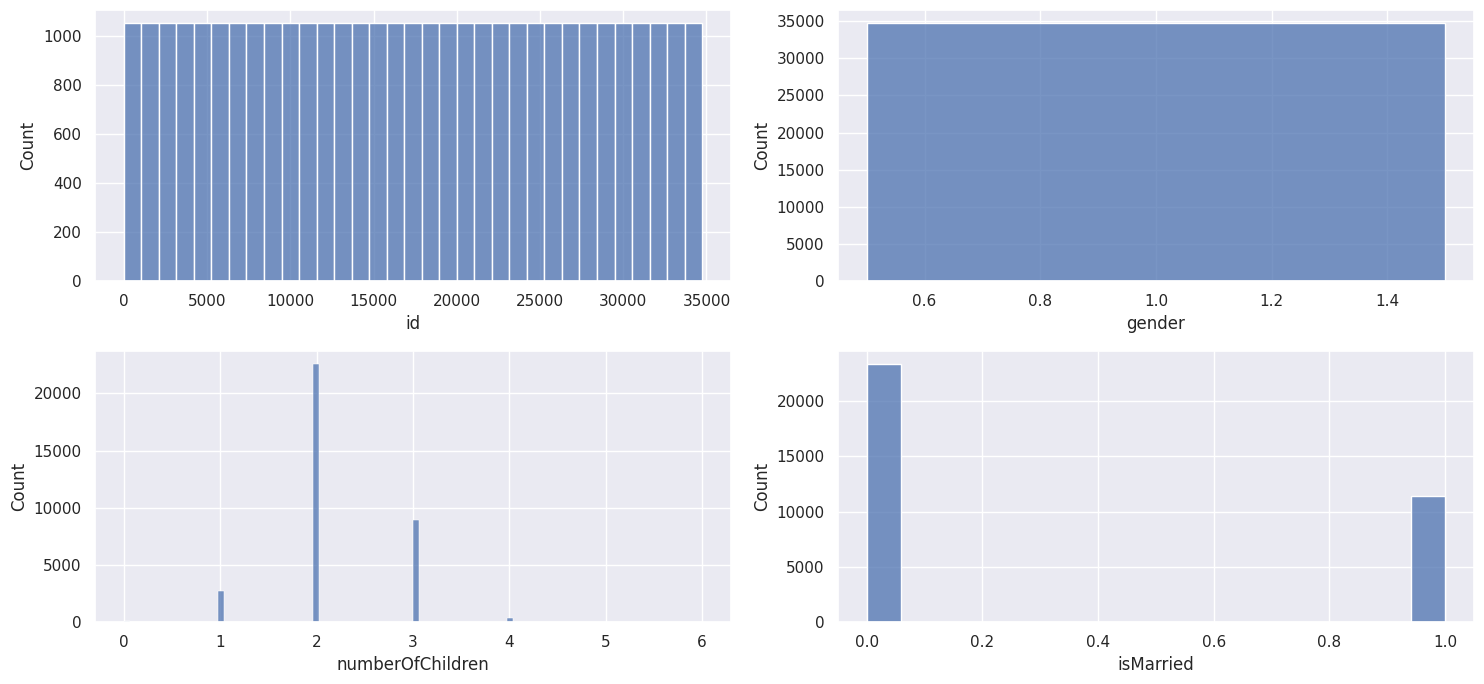

In [ ]:
# Display all numeric columns
col_to_plot = df.select_dtypes(include='number').columns.tolist()
f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(15, 7))
for i,x in zip(col_to_plot,axes.flat):
    sns.histplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
f.show()
plt.tight_layout()

In [ ]:
# Another visual to see outliers
col_to_plot = df.select_dtypes(include='number').columns.tolist()
f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(15, 7))
for i,x in zip(col_to_plot,axes.flat):
    sns.boxplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
f.show()
plt.tight_layout()

In [ ]:
# Plotting time series data on a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['startDate'], df['region'], marker='o')
plt.title('تاريخ التسجيل في البرنامج')
plt.xlabel('تاريخ التسجيل')
plt.ylabel('المناطق')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Question 2:** Which city has the highest median value?


In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plt.hist(df['city'])
plt.xlabel('city',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of city',fontsize=20);

## **Question 3:** What is the highest median value of numberOfChildren?


In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
plt.hist(df.numberOfChildren	)
plt.xlabel('Number of Children',fontsize=15)
plt.ylabel('Values',fontsize=15)
plt.title('Box Plot of Number of Children',fontsize=20);

##generate a grid of scatterplots for all pairs of numerical variables


In [ ]:
import seaborn as sns

sns.pairplot(df)
plt.show()

In [ ]:
# Display numerical columns asgainst each other
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## **Additional Tools for Analysis**

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile